In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерирование пуассоновских случайных процессов

## 1. Однородный пуассоновский поток событий

Однородный пуассоновский поток событий - это процесс, значение $N_t$ которого в момент $t$ равно числу событий, произошедших до момента $t$. 

Алгоритм генерирования реализации пуассоновского потока:

* $t = 0, I = 0$

* сгенерировать $U \sim U[0, 1]$

* обновить $t = t - \log(U) / \lambda$

* пока $t < T$:

  * обновить $I = I + 1, S(I) = t$
  
  * сгенерировать $U \sim U[0, 1]$
  
  * обновить $t = t - \log(U) / \lambda$

In [35]:
T = 1000
t = 0
I = 0
intensity = 0.02
S = []

U = np.random.uniform()
t = t - np.log(U) / intensity
while t < T:
    I = I + 1
    S.append(t)
    U = np.random.uniform()
    t = t - np.log(U) / intensity

In [36]:
Nt = np.zeros(1000)
max_n = 0
for i in xrange(1000):
    if max_n < len(S) and S[max_n] < i:
        max_n += 1
    Nt[i] = max_n

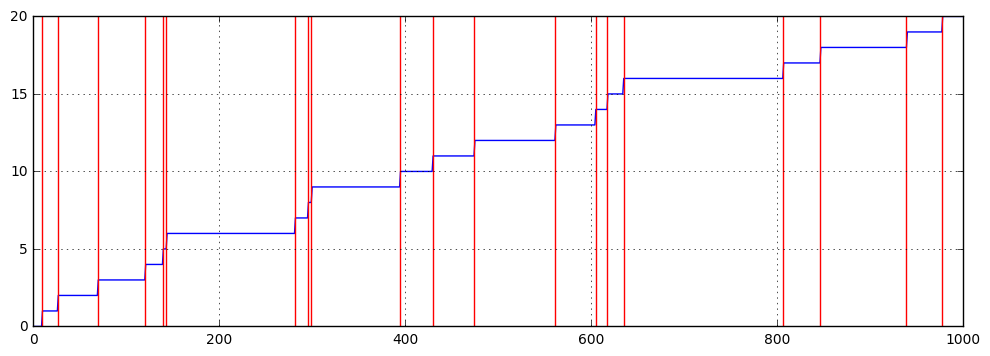

In [39]:
figure(figsize=(12, 4))
plot(Nt)
for s in S:
    axvline(s, 0, 10, color='r')
grid('on')

## 2. Неоднородный пуассоновский поток событий

Как мы видели, однородный поток событий определяется интенсивностью $\lambda > 0$. Неоднородный пуассоновский поток событий - это процесс, значение $N_t$ которого в момент $t$ равно числу событий, произошедших до момента $t$, причем его интенсивность - это функция времени $\lambda = \lambda(t) > 0$, а не постоянная величина.

На практике это означает следующую схему наблюдений. Рассмотрим *однородный* пуассоновский поток событий с интенсивностью $\lambda$. Пусть событие, появляющееся в момент времени $t$ "засчитывается" с некоторой вероятностью $p(t)$, так что $N_t = N_{t-\varepsilon} + 1$ с вероятностью $p(t)$, и $N_t = N_{t-\varepsilon}$ с вероятностью $1 - p(t)$. Тогда $N_t$ - неоднородный пуассоновский поток событий с интенсивностью $\lambda(t) = \lambda p(t)$.

Пусть требуется сгенерировать поток с заданной интенсивностью $\lambda(t)$ и $\lambda = \max\limits_{t\in [0, T]} \lambda(t)$. 
Алгоритм генерирования реализации неоднородного пуассоновского потока:

* $t = 0, I = 0$

* сгенерировать $U_1 \sim U[0, 1]$

* обновить $t = t - \log(U_1) / \lambda$

* пока $t < T$:

  * сгенерировать $U_2 \sim U[0, 1]$
  
  * если $U_2 < \lambda(t) / \lambda$:
  
    * обновить $I = I + 1, S(I) = t$
  
  * сгенерировать $U_1 \sim U[0, 1]$
  
  * обновить $t = t - \log(U_1) / \lambda$

In [51]:
T = 1000
t = 0
I = 0
max_intensity = 0.02
S = []

U1 = np.random.uniform()
t = t - np.log(U1) / max_intensity
while t < T:
    U2 = np.random.uniform()
    if U2 < max_intensity * (sin(1e-2 * t) + 1) / (2 * max_intensity):
        I = I + 1
        S.append(t)
    U1 = np.random.uniform()
    t = t - np.log(U1) / max_intensity

In [52]:
Nt = np.zeros(1000)
max_n = 0
for i in xrange(1000):
    if max_n < len(S) and S[max_n] < i:
        max_n += 1
    Nt[i] = max_n

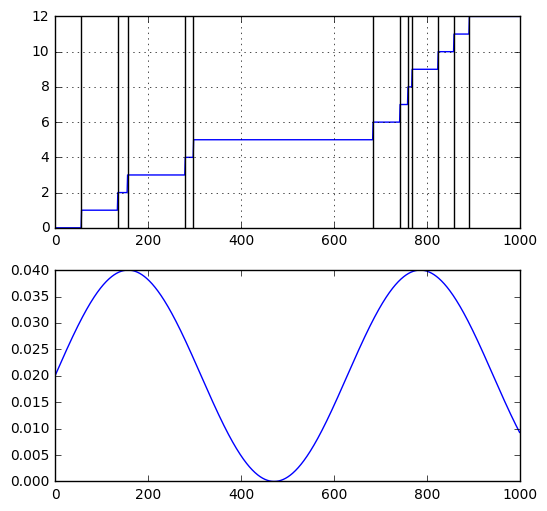

In [53]:
figure(figsize=(6, 6))
subplot(2, 1, 1)
plot(Nt)
for s in S:
    axvline(s, 0, 10, color='k')
grid('on')
subplot(2, 1, 2)
plot(max_intensity * (1 + sin(1e-2 * np.arange(1000))))